In this file, we will learn how to analyze how good an algorithm is in terms of speed and memory. Simply put, an **algorithm** is a program or function that solves some specific problem. For example, a sorting algorithm is an algorithm that, given a list of values, outputs that same list of values but rearranges them in increasing (or decreasing) order.

For any given problem, there are numerous ways to write an algorithm that solves it. In this file, we'll learn how to compare these algorithms and find the one that will perform the best.

Let's start by writing an algorithm that, given a list of numbers, outputs the maximum value of that list. After all, before we can start analyzing algorithms, we need to have some algorithms to analyze.

**Task**

Write a function, `maximum()` that returns the maximum value in the `values` list that is given as argument.

`def maximum(values):
    pass`
    
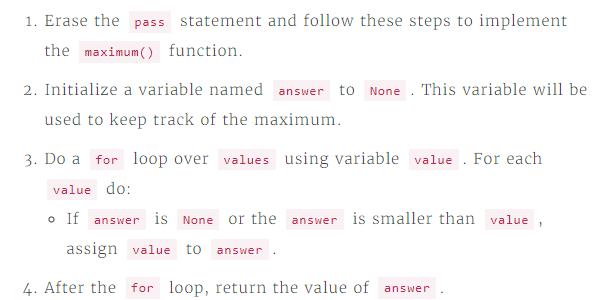

**Answer**

In [1]:
test_values = [4, 3, 5, 6, 2, 1]

def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer

max_value = maximum(test_values)

We're now going to learn how to measure the execution time of a Python function. Ultimately, our goal is not to measure the time of a specific execution of an algorithm, but rather to analyze the algorithm and predict how the execution time will evolve as data grows larger.

Intuitively, the more data an algorithm needs to process, the more time it will take to run. What we are interested in is building a model that tells us by how much the execution time grows as we increase the amount of data. We call these models the **time complexity of an algorithm**. By analyzing the time complexity of an algorithm, we want to be able to answer questions like:

If we double the data, do we double the execution time, do we quadruple it, or something else entirely?

Our starting point will be measuring execution times because it will help us build valuable intuition. Let's start by learning how to measure the execution time of a Python function.

Python offers a few different ways to do this. In this file, we will use the [`time` module](https://docs.python.org/3/library/time.html). Calling the [`time.time()` function](https://docs.python.org/3/library/time.html#time.time), we get the total number of seconds that have passed from January 1, 1970, until now (depending on our OS, this date might change, but that does not matter for what follows).

In [2]:
import time
print(time.time())

1610694021.4838426


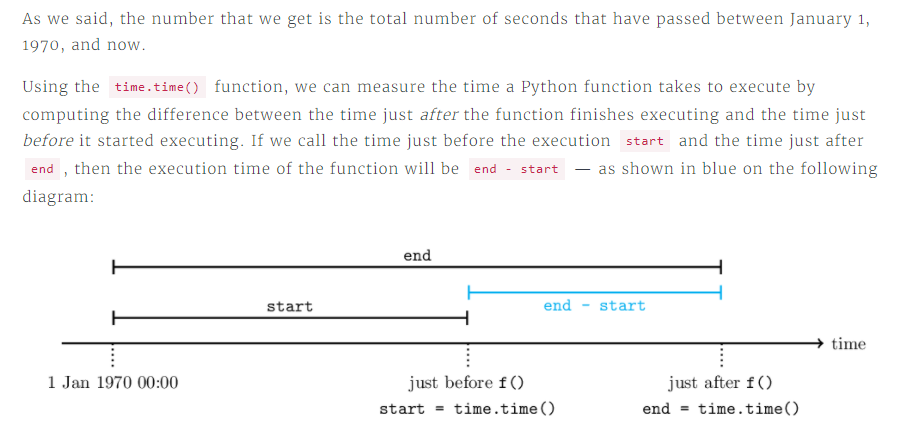

In [4]:
def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer


import time                
start = time.time()        
max_value = maximum(test_values)
end = time.time()          
runtime = end - start
print(runtime)

0.0


Above we measured the execution time of the `maximum()` function on a list with 500 elements. Just a single measurement doesn't help us understand how the `maximum()` function behaves in terms of execution time.

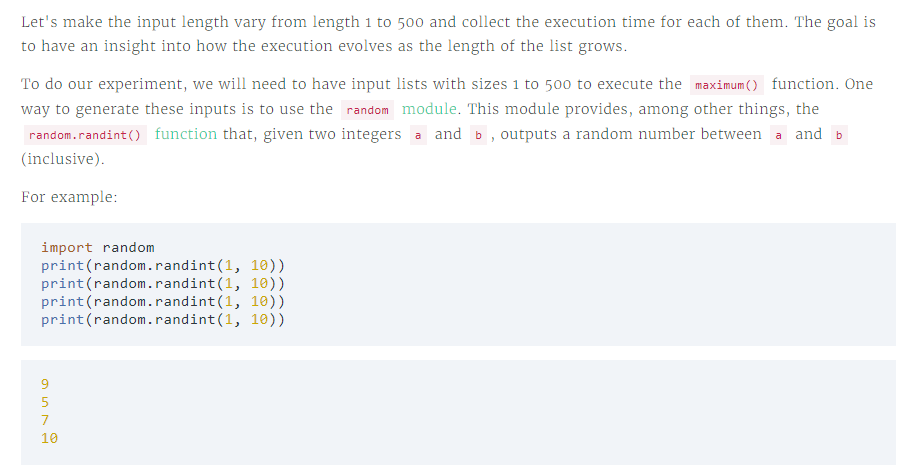

Using list comprehensions, we can use the `random.randint()` function to generate a random list of length 500 with values, say, from -1,000 to 1,000, as follows:

In [6]:
import random
values = [random.randint(-1000, 1000) for _ in range(500)]

Notice that we used the `_` notation in the above `for` loop. This is a notation that can be used when we do not use the iteration variable. It gives the exact same result that we would get using some variable name, but avoids having to find a name for something that we will not use.

Since we want to be able to generate inputs of lengths 1 to 500, it is convenient to define a function that takes as input a length and outputs a random list of the given length:

In [7]:
def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]

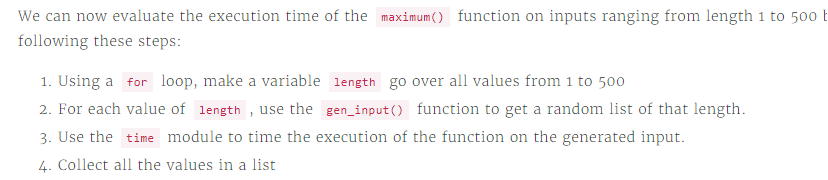

In [8]:
times = []

for length in range(1, 501):  
    values = gen_input(length)
    start = time.time()   
    maximum(values)        
    end = time.time()       
    runtime = end - start       
    times.append(runtime)

print(time)

<module 'time' (built-in)>


we evaluated the execution time of the `maximum()` function on input lists ranging from length 1 to length 500. The printed results are hard to read, so let's plot these times for visualizing how they are growing:

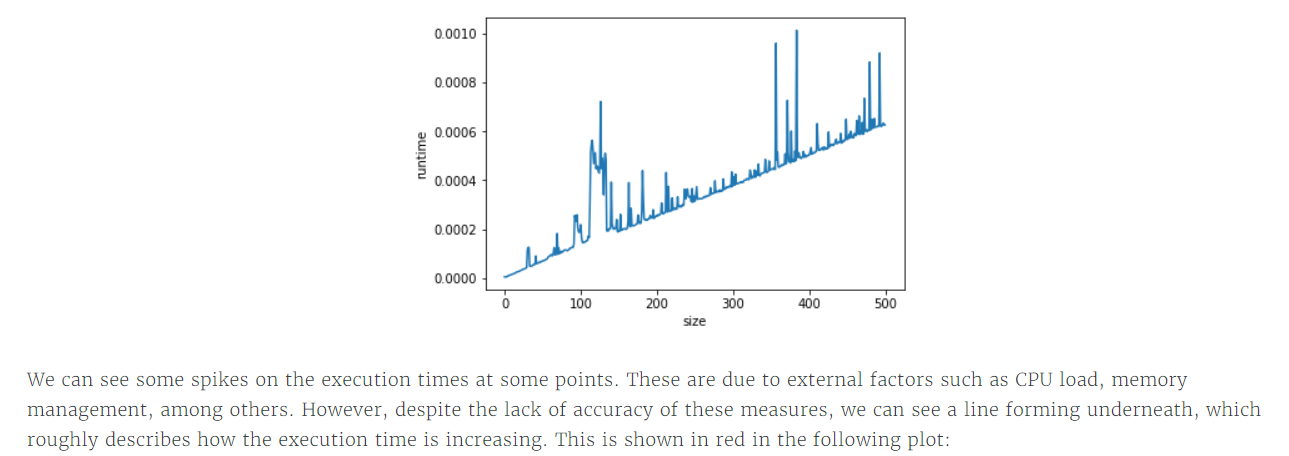

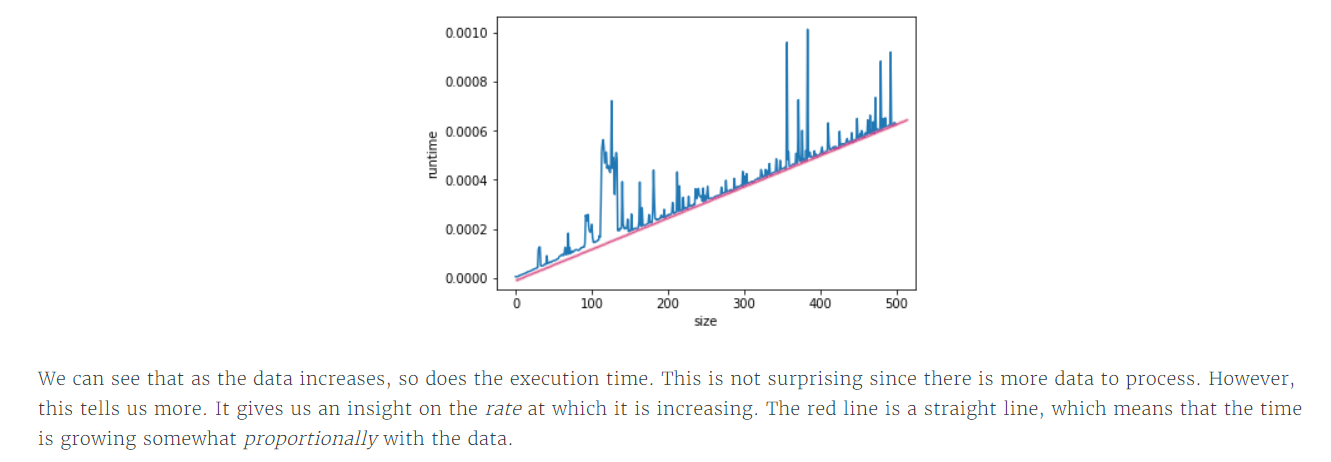

This is good news because it means that the execution time grows at the same rate as the data. Doubling the amount of data will double the amount of time needed to process it.

The purpose of this file is to learn how to look at an algorithm and derive a mathematical expression for the red line. As mentioned before, we call such an expression the time complexity of the algorithm:

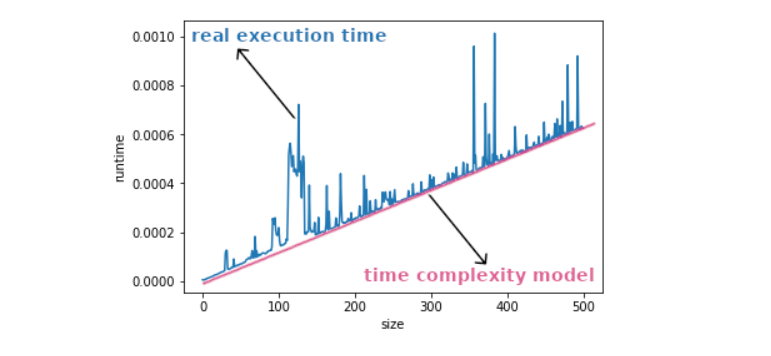

With the time complexity model, we are able to plug in a list length and get an idea of the execution time of the algorithm for that input length without needing to actually run the code. In general, the time complexity can have several behaviors; it does not always grow as a straight line. We will learn several types of growth throughout. By the end of this file, we'll be able to analyze an algorithm and provide a time complexity model:

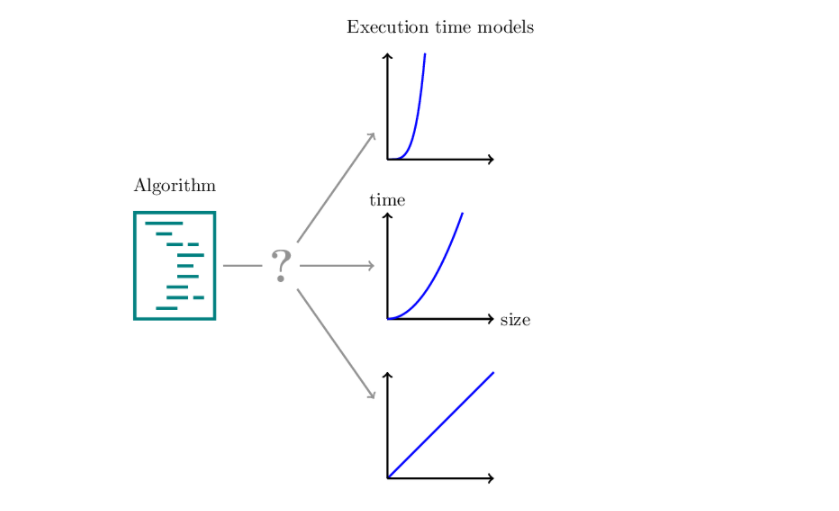

We'll learn how we can analyze the time complexity of the following function that computes the sum of all values in a given list:

In [9]:
def sum_values(values):
    total = 0            
    for value in values: 
        total += value   
    return total

Recall that we don't want to know the exact execution time, just how fast it is growing. Let's assume that each line of code takes some constant time to execute. We start by writing those (unknown) constants in front of each line:

In [10]:
def sum_values(values):
    total = 0            # c1
    for value in values: # c2
        total += value   # c3
    return total         # c4

The above comments mean that the first line takes some constant time c1 to be executed. The second takes c2 and so on. Then we can count how many times each line will be executed. This will depend on the length of the `values` list. Let's denote this length by N and write the execution count of each line in front of it:

In [11]:
def sum_values(values):
    total = 0            # c1, 1 time
    for value in values: # c2, N times
        total += value   # c3, N times
    return total         # c4, 1 time

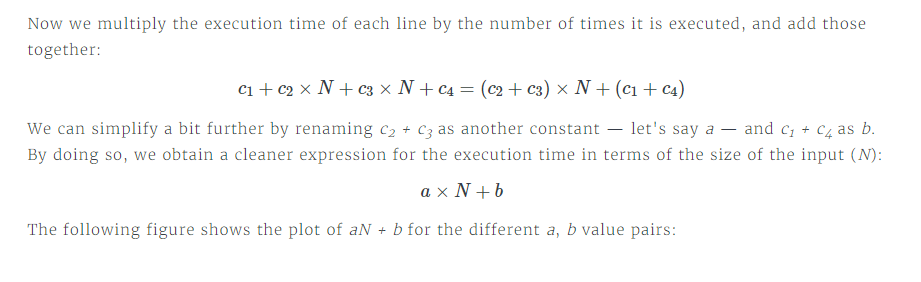

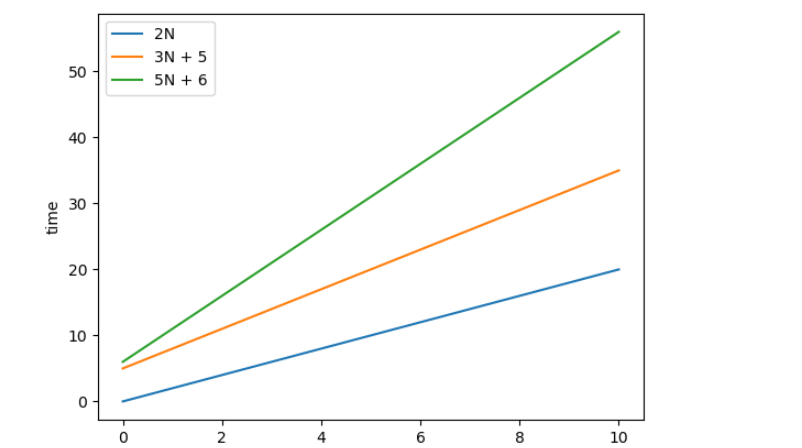

As we can see, regardless of the values of a and b, the function aN + b is a straight line. We call an algorithm whose time complexity is a straight line a linear time algorithm. These algorithms have the property that the execution times grows proportionally to the data:

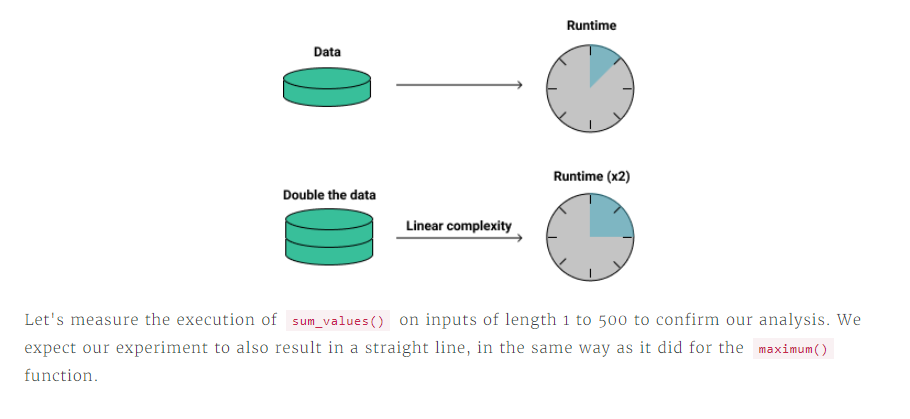

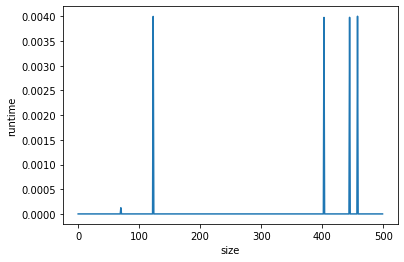

In [12]:
import time
import random
import matplotlib.pyplot as plt

def plot_times(times):
    plt.plot(times)
    plt.ylabel('runtime')
    plt.xlabel('size')
    plt.show()

def sum_values(values):
    total = 0            
    for value in values: 
        total += value   
    return total  

def gen_input(length):
    return [random.randint(-1000, 1000) for _ in range(length)]


times = []

for length in range(1, 501):  
    values = gen_input(length)
    start = time.time()   
    sum_values(values)        
    end = time.time()       
    runtime = end - start       
    times.append(runtime)
    
plot_times(times)

Our experiments match our theoretical model! When we plotted the execution times above, if everything went well, we got something similar to what we did with the `maximum()` function:

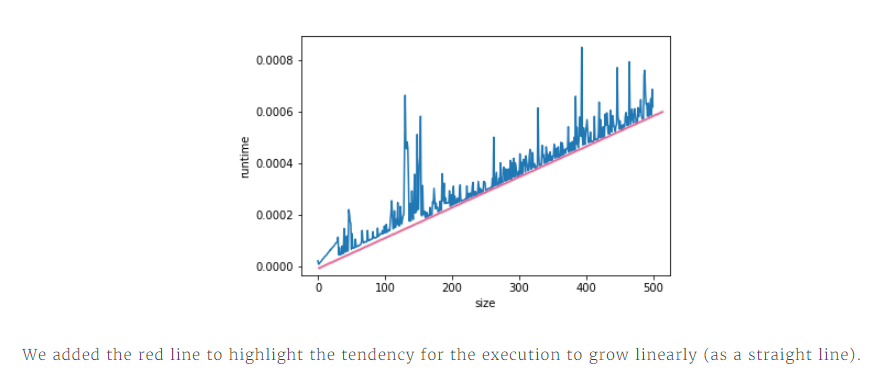

In our analysis above, we needed to count how many times each line of code was executed. However, we cannot always do that. Consider for instance the `maximum()` function from before:

In [13]:
def maximum(values):
    answer = None
    for value in values:
        if answer == None or answer < value:
            answer = value
    return answer

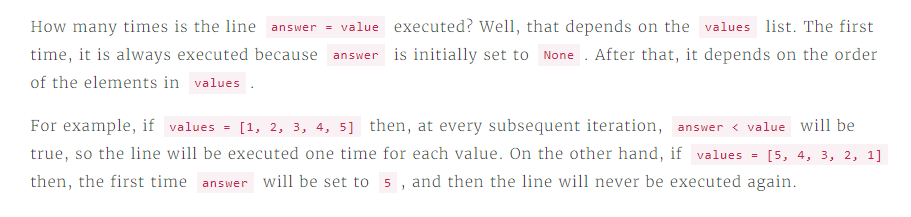

We say that the first is a **worst-case** execution analysis and the latter a **best-case** execution analysis. When building a model for the execution time of an algorithm, we often focus on the worst case. There a few reasons for doing so:

1. We usually want to process data from a lot of different sources and, consequently, it turns out that the worst-case actually occurs quite often.
2. It provides an upper bound. By focusing on the worst-case when building the execution time model, we can guarantee that the executions times will always behave at most as badly as the models predicts. 

Imagine that we are selling an algorithm that 1% of the time takes one second, and 99% takes over one year. If we advertise it as taking one second (best case), our customers will not be very pleased.

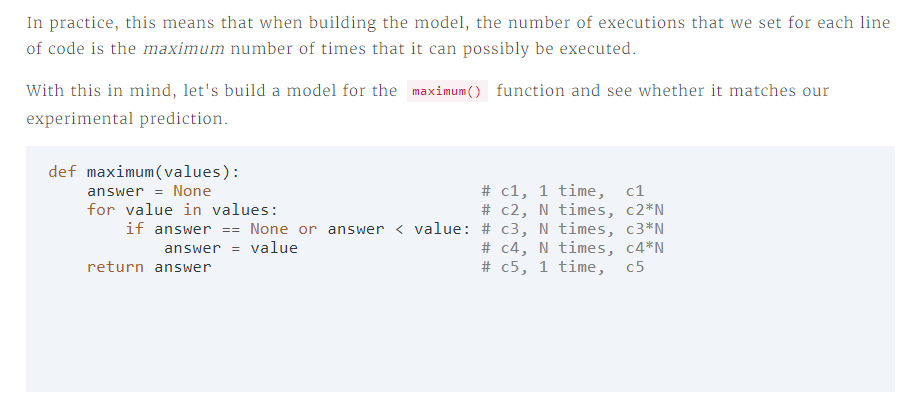

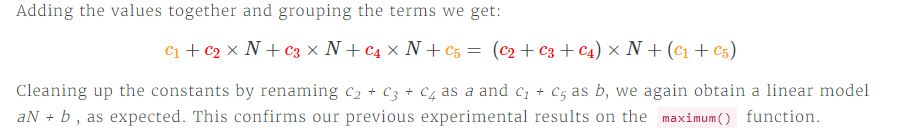

Now analyze a function while assuming worst-case number of executions for each line.

**Task**

A function `count_zeros()` has been provided together with three execution time models. Constant execution times have been assigned to each line.

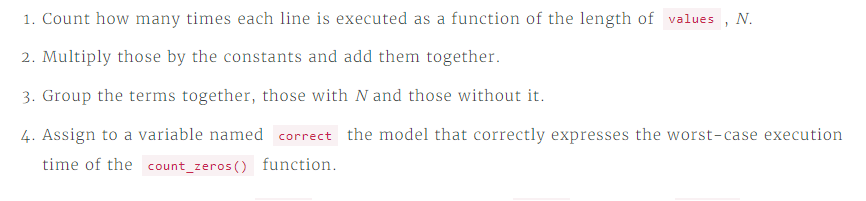

For example, if we think that `model1` is correct, then assign `model1` to variable `correct`.

**Answer**

In [14]:
def count_zeros(values):
    count = 0            # c1
    for value in values: # c2
        if value == 0:   # c3
            count += 1   # c4
    return count         # c5

model1 = '(c1 + c2) * N + (c3 + c4 + c5)'
model2 = '(c2 + c3) * N + (c1 + c4 + c5)'
model3 = '(c2 + c3 + c4) * N + (c1 + c5)'
# The line count for this function is the following:
"""
def count_zeros(values):
    count = 0            # c1, 1, c1
    for value in values: # c2, N, c2*N
        if value == 0:   # c3, N, c3*N
            count += 1   # c4, N, c4*N
    return count         # c5, 1, c3
"""
# Multiply them and add all terms together we get: 
# c1 + c2*N + c3*N + c4*N + c5
#
# By grouping terms together, we arrive at model3:
# (c2 + c3 + c4) * N + (c1 + c5)

correct = model3

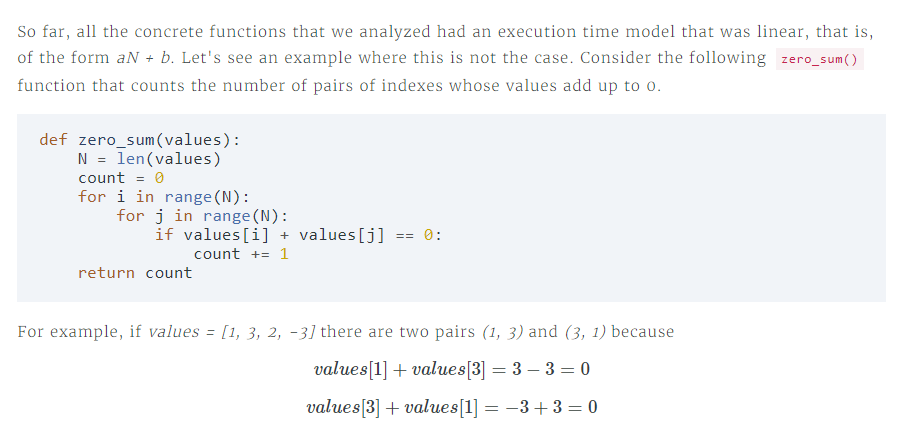

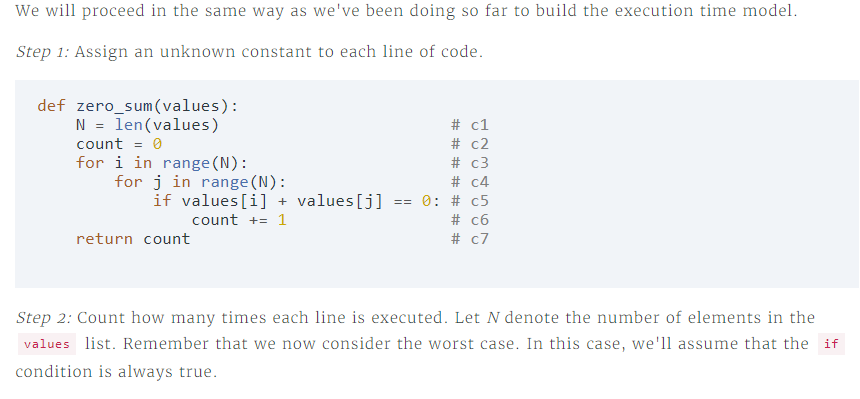

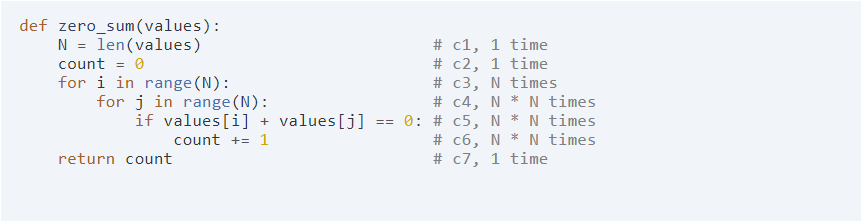

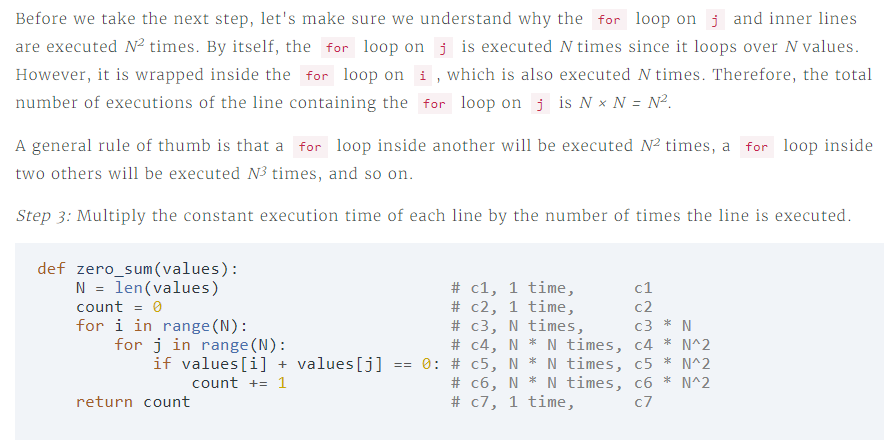

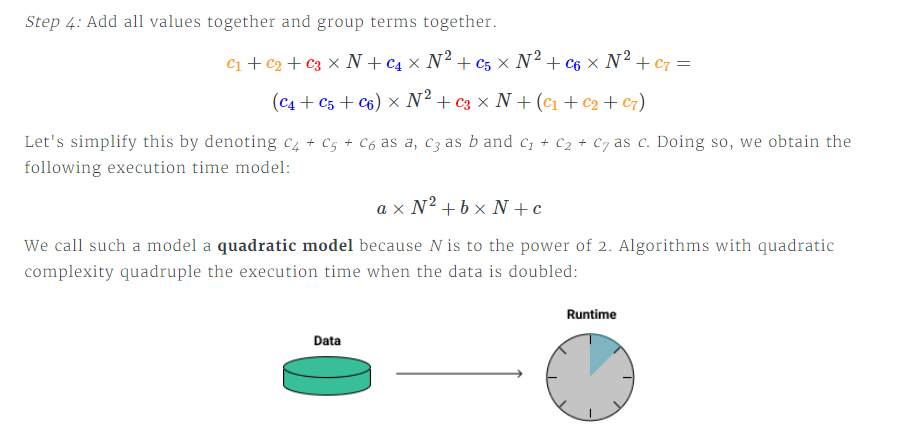

As the code becomes more complex, the analysis can become quite messy.

**Task**

A function `sum_pairs()` has been provided together with three execution time models. This function calculates the sum of all pairs of values in a given list.

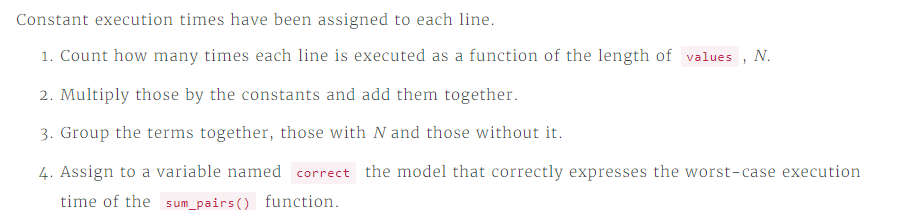

**Answer**

In [16]:
def sum_pairs(values):
    pair_sums = 0              # c1             
    for x in values:           # c2     
        for y in values:       # c3     
            pair_sums += x + y # c4
    return pair_sums           # c5

model1 = '(c3 + c4) * N^2 + c2 * N + (c1 + c5)'
model2 = 'c4 * N^2 + (c2 + c3) * N + (c1 + c5)'
model3 = '(c2 + c3 + c4) * N^2 + (c1 + c5)'
# The line count for this function is the following:

"""
def sum_pairs(values):
    pair_sums = 0              # c1, 1,   c1             
    for x in values:           # c2, N,   c2*N
        for y in values:       # c3, N^2, c3*N^2     
            pair_sums += x + y # c4, N^2, c4*N^2
    return pair_sums           # c5, 1,   c5
"""

# Multiplying them and adding all terms together we get: 
# c1 + c2*N + c3*N^2 + c4*N^2 + c5
#
# By grouping terms together, we arrive at model1:
# (c3 + c4) * N^2 + c2 * N + (c1 + c5)

correct = model1

So far, we have analyzed algorithms with only a few lines of code, so the calculations did not get extremely complex. However, as algorithms become more complicated, this process can become quite complex and cumbersome.

Moreover, remember that we are only interested in seeing how much the execution time grows as data grows, not the exact execution time. With this in mind, we can simplify our analysis even further by dropping unnecessary information.

1. Drop the line constants

Above, we started by assigning to each line of code a different constant expressing the time that line needs to execute.

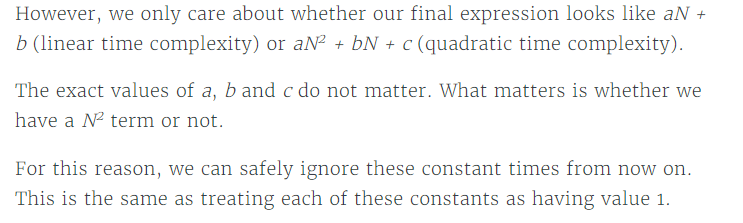

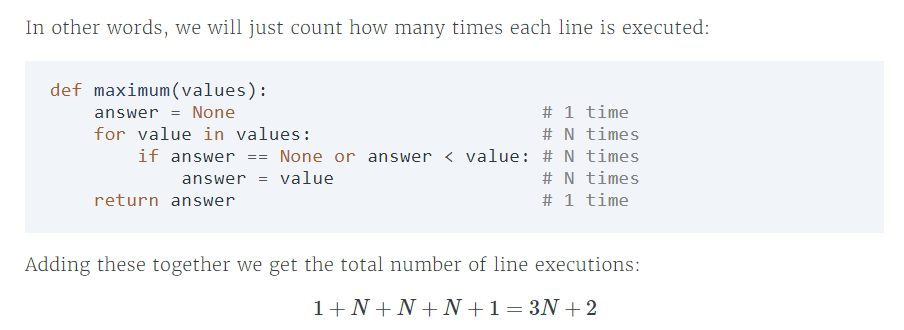

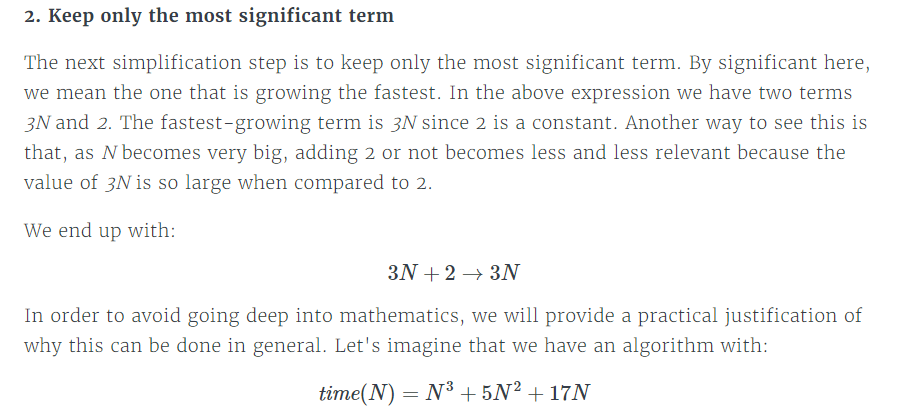

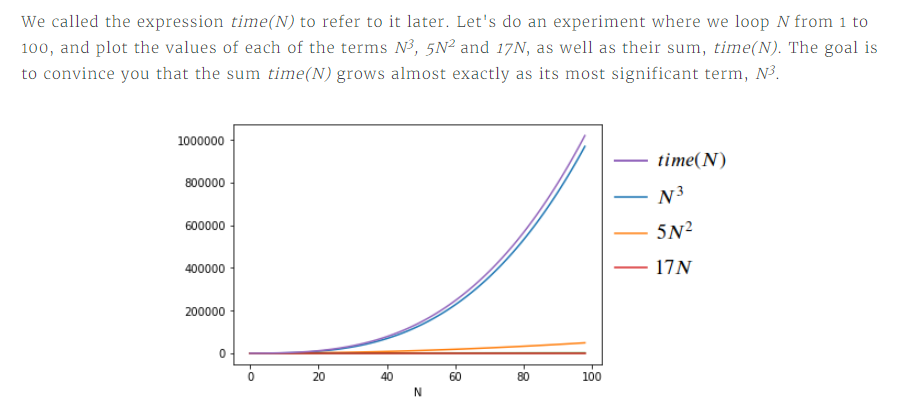

As we can see, the total time time(N) (purple curve) and the highest term $N^3$ (blue curve) are very similar. Therefore, when analyzing the execution time of an algorithm, we can drop all but the most significant term (the one with the highest exponent). So, in this case, we should simplify like so:

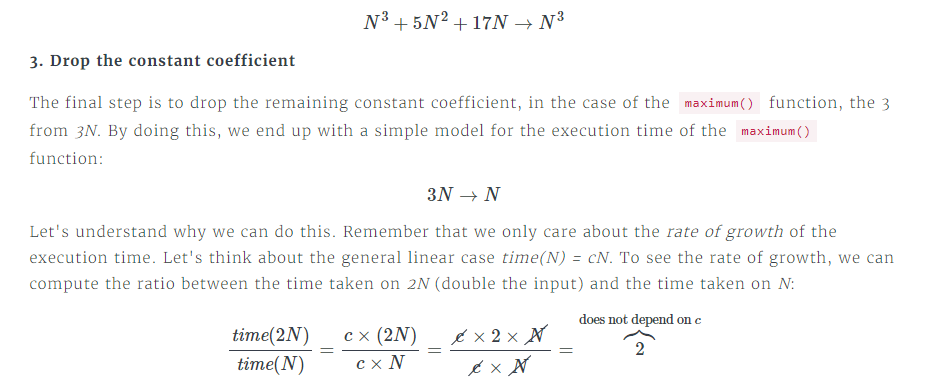

As we can see, the rate of growth does not depend on the constant c.
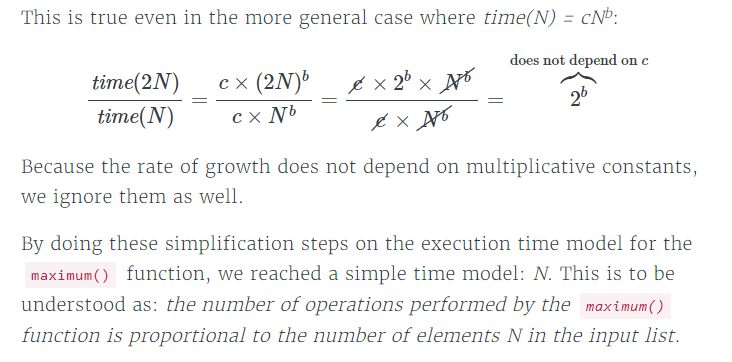

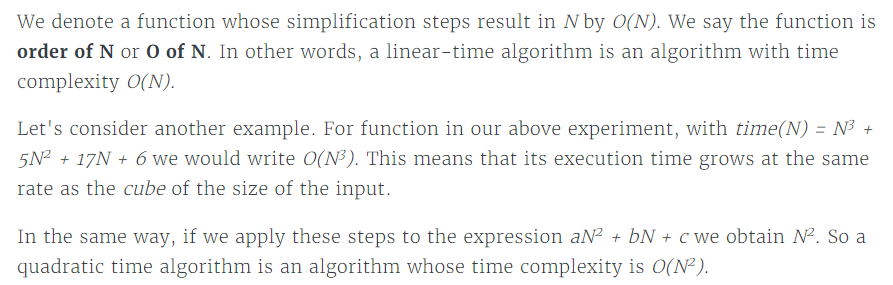

**Task**

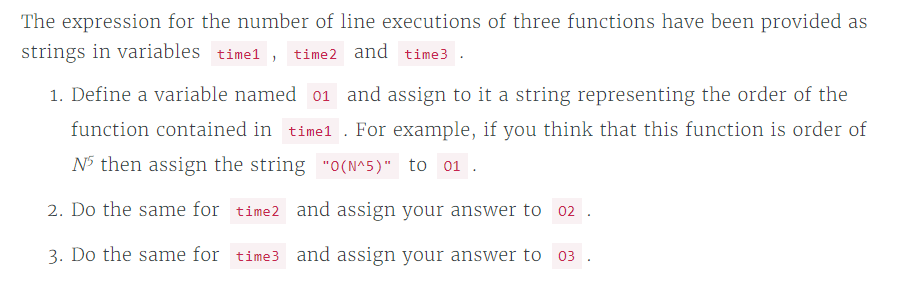

**Answer**

In [17]:
time1 = 'N^4 + N^2 + 1'
time2 = '7 * N^3 + 0.5 * N^2 + 100'
time3 = 'N^2 + 10000 * N + 999'
O1 = "O(N^4)"
O2 = "O(N^3)"
O3 = "O(N^2)"

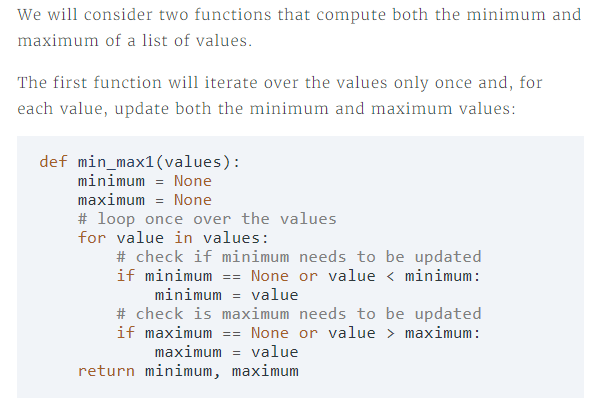

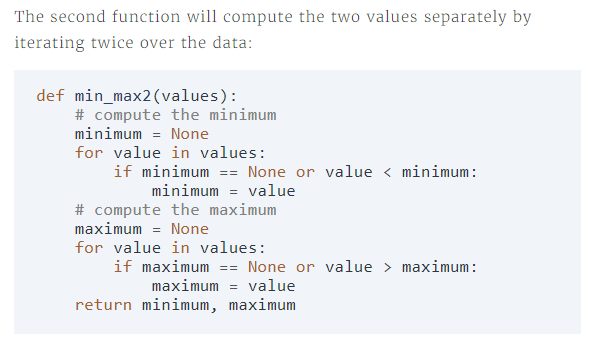

There is a common misconception that the first function will be more efficient than the second one because it iterates over the values only once. Now that we understand how we analyze the time complexity of a Python function, we should be able to see that this is not the case!

Before reading further, try convincing ourself of this by analyzing the order of these two functions, as we learned earlier.

Did we succeed? Let's see why so that we can confirm our analysis. Let's count how many times each line of `min_max1()` is executed (in the worst case). We will denote the number of elements in the list by N.

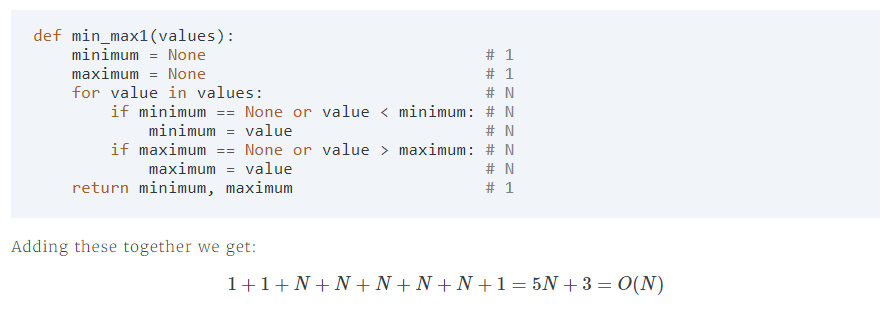

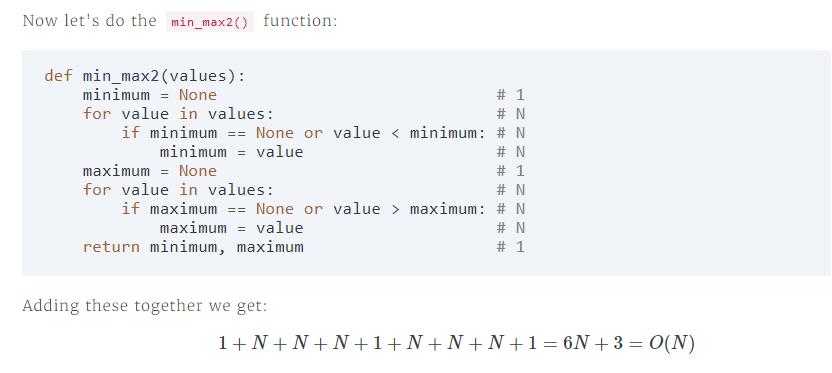

We conclude that both functions are order of N or O(N) , for short. Note that the fact that `min_max1()` is slightly faster ( 5N vs 6N ) should not be a major factor for preferring it over `min_max2()`. Unless we are doing highly specialized code that will run on a spaceship, for functions of the same order, we should favor factors such as:

* `Readability`: how easy the code is to read
* `Maintainability`: how easy it is to augment the code or re-use it

We're going to find out the order of growth of a more complex function.

**Task**

A function named `count_triples()` has been provided. Our task is to analyze its time complexity.

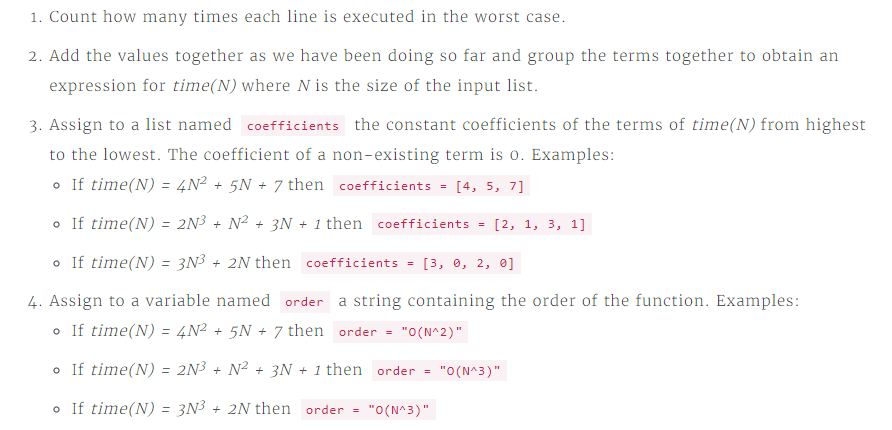

**Answer**

In [18]:
def count_triples(values):
    count = 0
    N = len(values)
    for i in range(N):
        for j in range(N):
            for k in range(N):
                if values[i] + values[j] + values[k] == 0:
                    count += 1
    return count

# The line count for this function is the following:
"""
def count_triples(values):
    count = 0                                              # 1
    N = len(values)                                        # 1
    for i in range(N):                                     # N
        for j in range(N):                                 # N^2
            for k in range(N):                             # N^3
                if values[i] + values[j] + values[k] == 0: # N^3
                    count += 1                             # N^3
    return count                                           # 1
"""
# Adding all terms together we get: 
# 1 + 1 + N + N^2 + N^3 + N^3 + N^3 + 1 = 3N^3 + N^2 + N + 3
# Drop low terms: 3N^3 + N^2 + N + 3 -> 3N^3
# Drop multiplicative constants: 3N^3 -> N^3 = O(N^3)

coefficients = [3, 1, 1, 3] # 3N^3 + N^2 + N + 3
order = "O(N^3)"

In this file, we've learned:

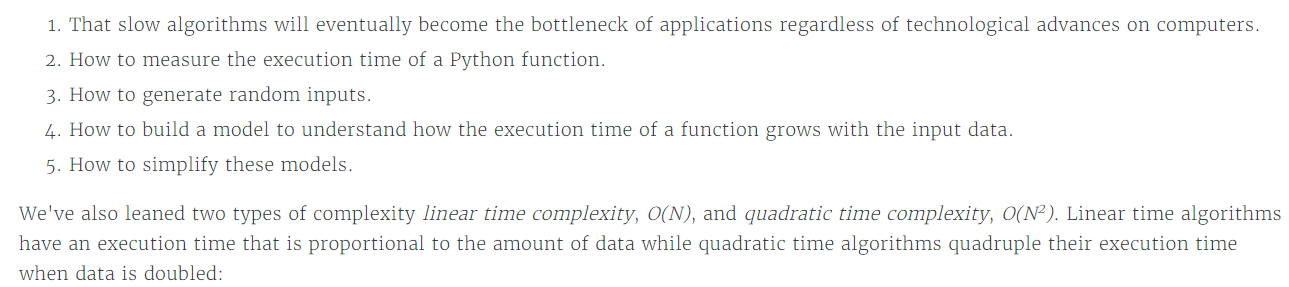

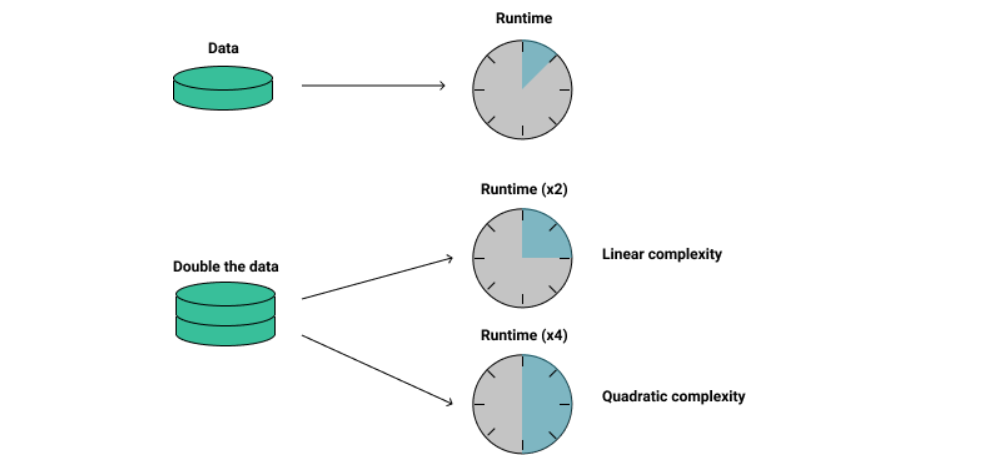